<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/Module3_Unsupervised_Learning_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock Market Data
## Unsupervised Learning: Dimension Reduction

In [2]:
# Install this if you don't have yfinance
!pip install yfinance

In [3]:
# Acknowledgement: Affinity Propogation Code modified from original code:
# See: https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html

import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import LineCollection

from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

d1 = datetime.datetime(2019, 05, 1)
d2 = datetime.datetime(2019, 12, 31)

symbol_dict = {
'MMM':'3M',
'AXP':'American Express',
'AAPL':'Apple',
'BA':'Boeing',
'CAT':'Caterpillar',
'CVX':'Chevron',
'CSCO':'Cisco',
'KO':'Coca-Cola',
'DIS':'Disney',
'DOW':'Dow',
'XOM':'ExxonMobil',
'GS':'Goldman Sachs',
'HD':'Home Depot',
'IBM':'IBM',
'INTC':'Intel',
'JNJ':'Johnson & Johnson',
'JPM':'JP Morgan Chase',
'MCD':'McDonalds',
'MRK':'Merck',
'MSFT':'Microsoft',
'NKE':'Nike',
'PFE':'Pfizer',
'PG':'Procter & Gamble',
'RTX':'Raytheon Technologies',
'TRV':'Travelers',
'UNH':'UnitedHealth',
'VZ':'Verizon',
'V':'Visa',
'WBA':'Walgreens',
'WMT':'Wal-Mart'}
symbols, names = np.array(list(symbol_dict.items())).T

In [4]:
names

array(['American Express', 'Boeing', 'Chevron', 'Cisco', 'Apple', 'Visa',
       'Caterpillar', 'Walgreens', 'Dow', 'Microsoft', 'IBM',
       'Home Depot', 'Disney', 'Raytheon Technologies',
       'Procter & Gamble', 'Goldman Sachs', 'Intel', 'Wal-Mart', 'Merck',
       'UnitedHealth', 'JP Morgan Chase', 'Verizon', 'ExxonMobil',
       'Travelers', 'Pfizer', 'Nike', 'McDonalds', 'Coca-Cola', '3M',
       'Johnson & Johnson'], dtype='|S21')

In [5]:
tickers = [yf.Ticker(symbol) for symbol in symbols]
quotes= [ticker.history(start = d1, end = d2) for ticker in tickers]

In [6]:
quotes[1].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-01,369.664253,372.271731,367.564616,367.974762,2765600,0.0,0
2019-05-02,366.705207,368.804845,364.507906,366.998169,2438800,0.0,0
2019-05-03,367.271596,369.048975,365.455174,367.642700,2953800,0.0,0
2019-05-06,359.263673,363.755939,357.066371,362.896545,4747600,0.0,0
2019-05-07,357.749937,359.097620,346.704839,348.863098,9740300,0.0,0


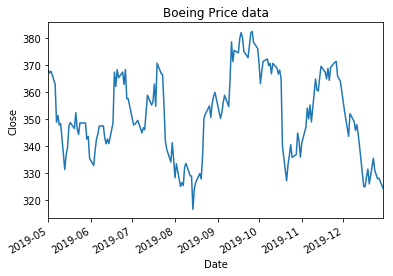

In [7]:
ba = quotes[1]
ba["Close"].plot()
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Boeing Price data")
plt.show()

In [8]:
closes = np.array([q.Close.to_numpy() for q in quotes])
opens = np.array([q.Open.to_numpy() for q in quotes])
df = pd.DataFrame(closes.T, columns = symbol_dict)
df.head()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,...,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
0,114.172501,367.974762,108.216606,52.995010,51.208199,161.043121,132.048035,50.142490,50.500355,125.228279,...,109.466438,53.035603,70.293938,136.918747,36.145630,84.414024,186.156952,45.936817,174.742844,135.295731
1,114.396912,366.998169,106.903046,52.384781,50.874950,159.391037,129.199631,50.245243,47.414379,123.592903,...,109.704079,53.476635,69.060883,136.555099,36.358410,83.794930,186.578781,45.747738,173.503174,134.657150
2,116.445816,367.642700,107.720566,52.384781,51.507393,160.301193,132.917831,50.516129,47.954201,126.227119,...,110.378967,53.711224,69.221718,137.177124,36.695305,84.217484,189.368698,46.059719,173.944565,135.352905
3,116.436050,362.896545,108.758568,52.051056,50.711975,160.538605,130.719421,50.366669,48.098145,125.492653,...,109.399902,53.401566,68.917908,137.253662,36.925816,82.124336,190.691727,45.823364,171.897263,135.429184
4,115.343307,348.863098,108.639130,50.964077,49.344929,158.490829,127.765892,49.451248,47.639301,122.917198,...,107.612839,53.138824,68.551567,135.607742,36.198826,81.112144,189.867218,45.379025,168.215912,133.408554


In [9]:
returns = np.log(df) - np.log(df.shift(1))
returns.head().dropna()

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,...,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
1,0.001964,-0.002657,-0.012213,-0.011582,-0.006529,-0.010312,-0.021807,0.002047,-0.063055,-0.013145,...,0.002169,0.008281,-0.017697,-0.002659,0.005869,-0.007361,0.002263,-0.004125,-0.007120,-0.004731
2,0.017752,0.001755,0.007618,0.000000,0.012355,0.005694,0.028372,0.005377,0.011321,0.021090,...,0.006133,0.004377,0.002326,0.004545,0.009223,0.005030,0.014842,0.006796,0.002541,0.005154
3,-0.000084,-0.012994,0.009590,-0.006391,-0.015563,0.001480,-0.016678,-0.002963,0.002997,-0.005836,...,-0.008910,-0.005782,-0.004399,0.000558,0.006262,-0.025168,0.006962,-0.005145,-0.011840,0.000563
4,-0.009429,-0.039438,-0.001099,-0.021104,-0.027327,-0.012838,-0.022854,-0.018342,-0.009586,-0.020736,...,-0.016470,-0.004932,-0.005330,-0.012064,-0.019884,-0.012402,-0.004333,-0.009744,-0.021649,-0.015033


In [10]:
# Use zscore to scale the log returns
from sklearn.preprocessing import StandardScaler
#Your code here

In [11]:
corrMatrix = returns.corr()
corrMatrix

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,...,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1.000000,0.255099,0.465005,0.497839,0.611910,0.656835,0.519769,0.417019,0.443455,0.686419,...,0.640815,0.311489,0.466055,0.415445,0.333515,0.537980,0.376811,0.321147,0.533424,0.317264
BA,0.255099,1.000000,0.290276,0.245597,0.308740,0.210643,0.368191,0.310466,0.292406,0.336172,...,0.298302,0.068388,0.318935,0.037820,0.075671,0.218418,-0.046216,0.061963,0.273609,0.207885
CVX,0.465005,0.290276,1.000000,0.407799,0.426668,0.257825,0.492304,0.451465,0.556842,0.417648,...,0.548161,0.253815,0.779851,0.168459,0.258789,0.370257,0.020227,0.088456,0.484453,0.163009
CSCO,0.497839,0.245597,0.407799,1.000000,0.544043,0.376184,0.406702,0.379102,0.420349,0.559259,...,0.446176,0.190026,0.444197,0.228527,0.304813,0.495737,0.213768,0.126242,0.399044,0.286392
AAPL,0.611910,0.308740,0.426668,0.544043,1.000000,0.542051,0.571560,0.452187,0.499121,0.636290,...,0.585205,0.130346,0.491134,0.298438,0.307153,0.573438,0.207305,0.226651,0.517324,0.227182
V,0.656835,0.210643,0.257825,0.376184,0.542051,1.000000,0.256973,0.214344,0.278147,0.780765,...,0.378565,0.219838,0.318756,0.561333,0.342824,0.430827,0.427812,0.393837,0.296917,0.209945
CAT,0.519769,0.368191,0.492304,0.406702,0.571560,0.256973,1.000000,0.539445,0.639146,0.417681,...,0.675744,0.174725,0.610876,0.115950,0.334414,0.419469,0.005324,0.089908,0.650680,0.164278
WBA,0.417019,0.310466,0.451465,0.379102,0.452187,0.214344,0.539445,1.000000,0.506791,0.350645,...,0.535654,0.217347,0.490725,0.108832,0.286882,0.362458,-0.006204,0.026375,0.468700,0.208817
DOW,0.443455,0.292406,0.556842,0.420349,0.499121,0.278147,0.639146,0.506791,1.000000,0.419983,...,0.571446,0.189213,0.548970,0.174669,0.294736,0.381695,-0.030189,0.170618,0.545845,0.137648
MSFT,0.686419,0.336172,0.417648,0.559259,0.636290,0.780765,0.417681,0.350645,0.419983,1.000000,...,0.487923,0.198341,0.443631,0.430811,0.344197,0.554227,0.358881,0.344485,0.466291,0.318017


In [12]:

# Limit number of digits:
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,AXP,BA,CVX,CSCO,AAPL,V,CAT,WBA,DOW,MSFT,IBM,HD,DIS,RTX,PG,GS,INTC,WMT,MRK,UNH,JPM,VZ,XOM,TRV,PFE,NKE,MCD,KO,MMM,JNJ
AXP,1,0.26,0.47,0.5,0.61,0.66,0.52,0.42,0.44,0.69,0.53,0.46,0.42,0.61,0.33,0.66,0.55,0.49,0.35,0.3,0.64,0.31,0.47,0.42,0.33,0.54,0.38,0.32,0.53,0.32
BA,0.26,1,0.29,0.25,0.31,0.21,0.37,0.31,0.29,0.34,0.26,0.24,0.11,0.41,0.1,0.34,0.26,0.2,0.073,0.12,0.3,0.068,0.32,0.038,0.076,0.22,-0.046,0.062,0.27,0.21
CVX,0.47,0.29,1,0.41,0.43,0.26,0.49,0.45,0.56,0.42,0.44,0.28,0.28,0.48,0.035,0.55,0.38,0.26,0.12,0.17,0.55,0.25,0.78,0.17,0.26,0.37,0.02,0.088,0.48,0.16
CSCO,0.5,0.25,0.41,1,0.54,0.38,0.41,0.38,0.42,0.56,0.5,0.31,0.35,0.46,0.25,0.46,0.48,0.14,0.27,0.24,0.45,0.19,0.44,0.23,0.3,0.5,0.21,0.13,0.4,0.29
AAPL,0.61,0.31,0.43,0.54,1,0.54,0.57,0.45,0.5,0.64,0.54,0.47,0.4,0.6,0.23,0.63,0.65,0.32,0.27,0.16,0.59,0.13,0.49,0.3,0.31,0.57,0.21,0.23,0.52,0.23
V,0.66,0.21,0.26,0.38,0.54,1,0.26,0.21,0.28,0.78,0.47,0.42,0.38,0.55,0.4,0.42,0.46,0.48,0.39,0.16,0.38,0.22,0.32,0.56,0.34,0.43,0.43,0.39,0.3,0.21
CAT,0.52,0.37,0.49,0.41,0.57,0.26,1,0.54,0.64,0.42,0.54,0.41,0.3,0.61,0.05,0.67,0.6,0.31,0.055,0.27,0.68,0.17,0.61,0.12,0.33,0.42,0.0053,0.09,0.65,0.16
WBA,0.42,0.31,0.45,0.38,0.45,0.21,0.54,1,0.51,0.35,0.45,0.34,0.21,0.45,0.064,0.5,0.38,0.18,0.066,0.29,0.54,0.22,0.49,0.11,0.29,0.36,-0.0062,0.026,0.47,0.21
DOW,0.44,0.29,0.56,0.42,0.5,0.28,0.64,0.51,1,0.42,0.52,0.25,0.2,0.52,0.064,0.6,0.48,0.21,0.1,0.21,0.57,0.19,0.55,0.17,0.29,0.38,-0.03,0.17,0.55,0.14
MSFT,0.69,0.34,0.42,0.56,0.64,0.78,0.42,0.35,0.42,1,0.59,0.47,0.4,0.62,0.37,0.52,0.61,0.45,0.39,0.29,0.49,0.2,0.44,0.43,0.34,0.55,0.36,0.34,0.47,0.32


# PCA Analysis: Compute the Eigenvalues and EigenVectors ; Interpret it
Refer:https://plotly.com/python/v3/ipython-notebooks/principal-component-analysis/

In [15]:
#import plotly.express as px
from sklearn.decomposition import PCA

df = returns.dropna()
#features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df)



In [17]:
pca.explained_variance_ratio_

array([0.40493715, 0.09026624, 0.05136719, 0.04400007, 0.04183892,
       0.03922987, 0.03129876, 0.02736341, 0.02418167, 0.02273887,
       0.02113057, 0.02004679, 0.0195861 , 0.01644874, 0.01631854,
       0.01536439, 0.01436744, 0.01359772, 0.01159767, 0.01129821,
       0.01050621, 0.00970632, 0.0084075 , 0.00748089, 0.00659775,
       0.00565452, 0.00459937, 0.00400634, 0.00343179, 0.00263098])